In [1]:
import os 
import numpy as np
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
from utils import extract_pool
from utils.optim_utils import optim_pool
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn
from tqdm import tqdm 
import pandas as pd 

/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/brainio_collection/lookup.csv


/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [2]:
extract_id=['group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_2-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_3-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_4-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=best_performing_pereira_5-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False']

#Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
#                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

#control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
#'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [3]:
#extract_id=['group=set_3-dataset=ud_sentences_filter_v2-brain_resp-bench=Fedorenko2016v3-encoding-weights_v2-ave=False',
#           'group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False']
optim_id=['coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2']

In [4]:
optim_files=[]
optim_results=[]
for ext in extract_id:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_2-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_3-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_4-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_g

/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


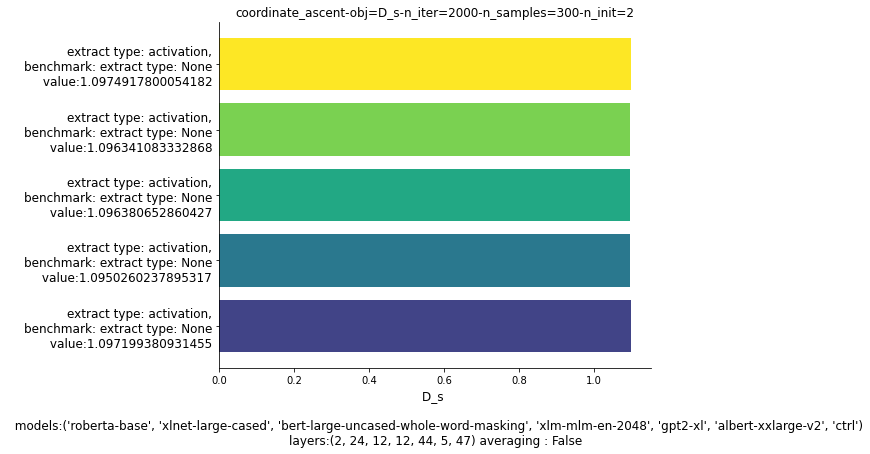

In [5]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}\n value:{res['optimized_d']}")
    tick.append(idx)

    
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

In [6]:
xy_val=[[len(set(x['optimized_S']).intersection(set(y['optimized_S']))) for y in optim_results] for x in optim_results ]
x_cord=[[(idx,f"{x['extractor_name']}\n{x['data_type']}\n") for y in optim_results] for idx, x in enumerate(optim_results) ]
y_cord=[[(idy,f"{x['data_type']}\n{x['optimizatin_name']}") for idy,y in enumerate(optim_results)] for x in optim_results ]
x_cord1=[x[0] for x in x_cord]
y_cord1=y_cord[0]

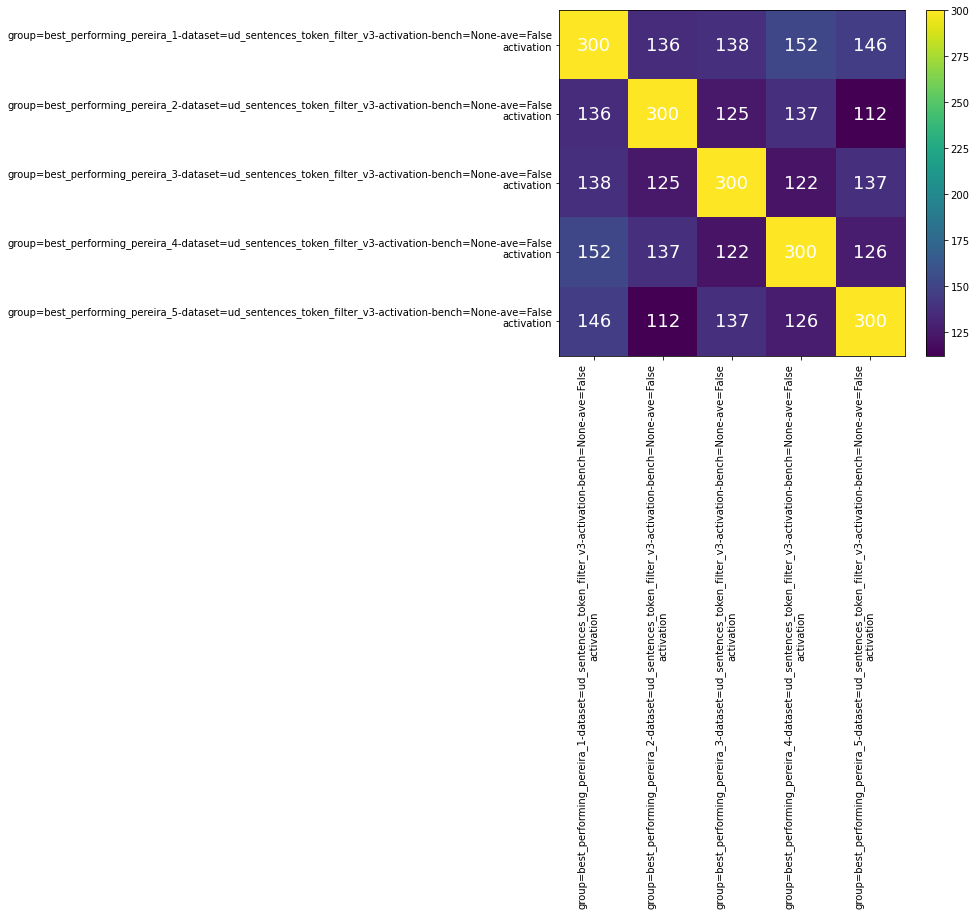

In [7]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
tick_l=[]
tick=[]
im=ax.imshow(np.stack(xy_val))
ytick=[y[0] for y in y_cord1]
yticklabel=[y[1] for y in y_cord1]

xtick=[x[0] for x in x_cord1]
xticklabel=[x[1] for x in x_cord1]

ax.set_xticks(xtick)
ax.set_xticklabels(xticklabel,rotation = 90)

ax.set_yticks(xtick)
ax.set_yticklabels(xticklabel,rotation = 0)
fig.colorbar(im , orientation='vertical')

for i in range(np.stack(xy_val).shape[0]):
    for j in range(np.stack(xy_val).shape[1]):
        text = ax.text(j, i, np.stack(xy_val)[i,j],
                       ha="center", va="center", color="w",fontsize=18)



In [8]:
np.stack(xy_val)

array([[300, 136, 138, 152, 146],
       [136, 300, 125, 137, 112],
       [138, 125, 300, 122, 137],
       [152, 137, 122, 300, 126],
       [146, 112, 137, 126, 300]])

In [12]:
lex_names=[x['name'] for x in LEX_PATH_SET]
sample_values=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    lex_values=[[np.nanmean(sent_dat[lex_name]) for lex_name in lex_names] for sent_dat in ext_obj.data_]
    values=[lex_values[id] for id in res['optimized_S']]
    sample_values.append(np.stack(values))

loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 179511.11it/s]
901it [00:00, 178350.46it/s]
901it [00:00, 177055.28it/s]
901it [00:00, 188453.99it/s]
901it [00:00, 185648.85it/s]
901it [00:00, 191899.05it/s]
901it [00:00, 190285.39it/s]
901it [00:00, 187240.15it/s]
902it [00:00, 177077.57it/s]
/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 213760.28it/s]
901it [00:00, 213966.02it/s]
901it [00:00, 217675.70it/s]
901it [00:00, 215503.42it/s]
901it [00:00, 219687.71it/s]
901it [00:00, 219063.70it/s]
901it [00:00, 217487.79it/s]
901it [00:00, 217275.22it/s]
902it [00:00, 216149.36it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 206033.58it/s]
901it [00:00, 221438.41it/s]
901it [00:00, 215909.72it/s]
901it [00:00, 214014.49it/s]
901it [00:00, 222914.40it/s]
901it [00:00, 214683.17it/s]
901it [00:00, 212247.57it/s]
901it [00:00, 220623.97it/s]
902it [00:00, 217453.86it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 190813.83it/s]
901it [00:00, 191616.87it/s]
901it [00:00, 186317.01it/s]
901it [00:00, 185130.45it/s]
901it [00:00, 181250.26it/s]
901it [00:00, 190323.73it/s]
901it [00:00, 190525.23it/s]
901it [00:00, 179451.44it/s]
902it [00:00, 189656.22it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 202750.57it/s]
901it [00:00, 203888.21it/s]
901it [00:00, 225078.49it/s]
901it [00:00, 213097.32it/s]
901it [00:00, 219917.82it/s]
901it [00:00, 221750.26it/s]
901it [00:00, 200534.25it/s]
901it [00:00, 214939.59it/s]
902it [00:00, 215227.11it/s]


In [ ]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(1, len(lex_names)+1):
    plt.subplot(4, 2, i)
    
    seaborn.distplot(np.stack(lex_values)[:,i-1],bins=50,label='full',norm_hist=True,hist=False,kde_kws={"lw": 5,"color":'k'})
    for idx,val in enumerate(sample_values):
        optim_spec=optim_results[idx]['optimizatin_name'].split('-')
        name=f"{optim_results[idx]['benchmark']}\n{optim_results[idx]['data_type']}"
        seaborn.distplot(val[:,i-1],bins=50,label=name,norm_hist=True,hist=False,kde_kws={"lw": 3})   
    #seaborn.distplot(select_s_feat_mean_new[i-1],bins=50,label='sample',norm_hist=True)
    #ax=plt.gca()
    #ax.set_xticks(np.linspace(s_with_all_feat[i-1].min(),s_with_all_feat[i-1].max(),num=10))
    random_set=np.random.randint(0,np.stack(lex_values).shape[0],200)
    seaborn.distplot(np.stack(lex_values)[random_set,i-1],bins=50,label='random',norm_hist=True,hist=False,kde_kws={"lw": 2,"color": (.5,.5,.5)})
    if i==len(lex_names):
        plt.legend(loc='upper right')
    plt.ylabel(lex_names[i-1],fontsize=14);


# compute the predicted brain based on neural activation list

In [11]:
benmarks=[x['benchmark'] for x in optim_results]
data_type=[x['data_type'] for x in optim_results]

In [12]:
extract_id=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']


In [13]:
ds_transform=[dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                   trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                       'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              
             dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                  trgs=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
]


In [15]:
ds_transform=[dict(src='group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                  trgs=['group=best_performing_pereira_2-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira_3-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_4-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_5-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2'),
              dict(src='group=best_performing_pereira_2-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                  trgs=['group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                      'group=best_performing_pereira_3-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_4-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                       'group=best_performing_pereira_5-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False'],
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2'),
           
]


In [ ]:
PAIR_COMPARISON=[]
for idx, ds_t in enumerate(ds_transform):
    result=dict()
    result['idx']=idx
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    ext_obj()
    optimizer_obj = optim_pool[ds_t['optim']]()
    optimizer_obj.load_extractor(ext_obj)
    ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
    result[f"SRC: {res['data_type']}; {res['benchmark']}"]=ds_src
    # 
    for trg in ds_t['trgs']:
            optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
            res_trg=load_obj(optim_file)
            ds_trg=optimizer_obj.mod_objective_function(res_trg['optimized_S'])
            result[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]=ds_trg
     
    # get the random set 
    ds_rand=[]
    for k in tqdm(enumerate(range(50))):
        sent_random=list(np.random.choice(optimizer_obj.N_S,optimizer_obj.N_s))
        ds_rand.append(optimizer_obj.mod_objective_function(sent_random))
    result[f"RND: {res['data_type']}; {res['benchmark']}"]=ds_rand
    PAIR_COMPARISON.append(result)

In [15]:
Pereira_rand=PAIR_COMPARISON[0]['RND: brain_resp; Pereira2018-encoding-weights']

loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_2-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_3-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_4-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_g

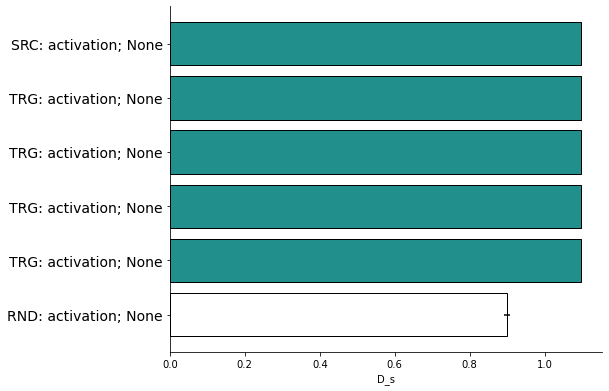

In [43]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
alph_col=cmap(np.divide(range(len(PAIR_COMPARISON)),len(PAIR_COMPARISON)))
tick_l=[]
tick=[]
src_tick=[]
src_tick_l=[]
alph_col1=alph_col[(1,0),:]
for idx, pair in enumerate([PAIR_COMPARISON[0]]):
    ds_t=ds_transform[pair['idx']]
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    src=[pair[f"SRC: {res['data_type']}; {res['benchmark']}"]]
    src_tick_l.append(f"SRC: {res['data_type']}; {res['benchmark']}")
    for trg in ds_t['trgs']:
        optim_file=os.path.join(RESULTS_DIR,f"results_{trg}_{optim}.pkl")
        res_trg=load_obj(optim_file)
        pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"]
        src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        src_tick_l.append(f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}")
    ax.barh(np.arange(len(src))+idx*5,src,edgecolor=(0,0,0),color=alph_col1[idx,:])
    
    ax.set_yticklabels(src_tick)
    # random set 
    src_rand=pair[f"RND: {res['data_type']}; {res['benchmark']}"]
    src_tick_l.append(f"RND: {res['data_type']}; {res['benchmark']}")
    ax.barh(len(src)+idx*5,np.mean(src_rand),xerr=np.std(src_rand),color=(1,1,1),edgecolor=(0,0,0))
    

    src_tick.append(np.arange(len(src)+1)+idx*5)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(src_tick).flatten())
ax.set_yticklabels(src_tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to_anchor=(1.1, .85), frameon=True,fontsize=12)
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 1 

In [148]:
extract_group=[['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
            'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False'],
            ['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
             'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False'],
['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False']]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False']

In [149]:
optim_files=[]
optim_group=[]
for ext in extract_group:
    optim_results=[]
    for ex in ext:
        for optim in optim_id:
            optim_file=os.path.join(RESULTS_DIR,f"results_{ex}_{optim}.pkl")
            optim_files.append(optim_file)
            optim_results.append(load_obj(optim_file))
        
    optim_group.append(optim_results)

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyDa

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_group)),len(optim_group)))
tick_l=[]
tick=[]
for idx, results in enumerate(optim_group):
    group_res=[]
    for res in results:
        group_res.append(res['optimized_d'])

        
        
    #pair[f"TRG: {res_trg['group']}; {res_trg['benchmark']}"]
    #    src.append(pair[f"TRG: {res_trg['data_type']}; {res_trg['benchmark']}"])
        tick_l.append(res['extractor_name'])
        tick
    ax.barh(np.arange(len(group_res))+idx*5,group_res,edgecolor=(0,0,0),color=alph_col[idx,:])
    tick.append(np.arange(len(group_res))+idx*5)
    #ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    #ext_obj=extract_pool[res['extractor_name']]()
    #tick_l.append(f"extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    #tick.append(idx)
ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks(np.array(tick).flatten())
ax.set_yticklabels(tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

    
#ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
#ax.set_yticklabels(tick_l,fontsize=12)
#ax.set_yticks(tick)
#ax.set_title(res['optimizatin_name'],fontsize=12)
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
#ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

# control 2: inidividual Pereira results 

In [152]:
Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
    'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

In [153]:
optim_files=[]
optim_results=[]
for ext in Pereira_control:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


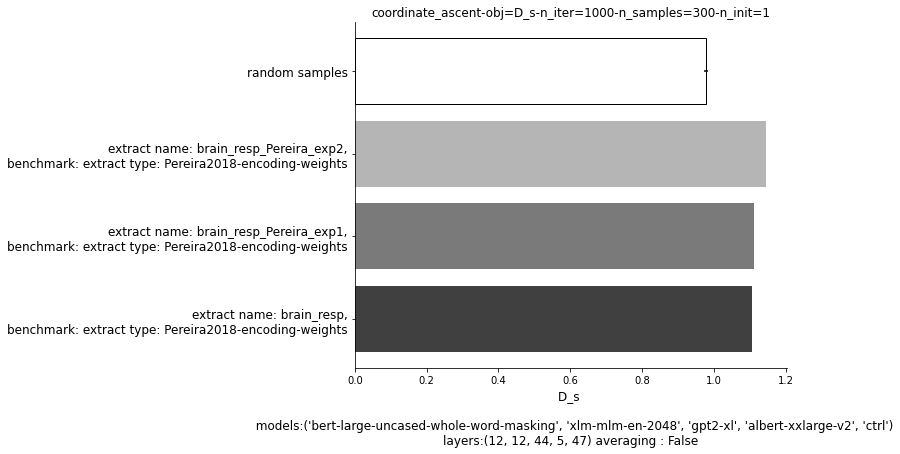

In [168]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('Greys')

alph_col=np.flipud(cmap(np.divide(range(len(optim_results)+2),len(optim_results)+2)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.barh(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"extract name: {ext_obj.extract_name},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    tick.append(idx)

ax.barh(len(optim_results),np.mean(Pereira_rand),xerr=np.std(Pereira_rand),color=(1,1,1),edgecolor=(0,0,0),label=res['optimizatin_name'])
tick_l.append(f"random samples")
tick.append(len(optim_results))
    
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Example sentences : 

In [ ]:

for idx, res in enumerate(optim_results):
    select_sent=[]
    values=[]
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    [values.append([id, ext_obj.data_[id]['text']]) for id in np.sort(res['optimized_S'])]
    with open(os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt"), 'w') as f:
        for item in values:
            f.write("%d, %s\n" % (item[0],item[1]))


In [ ]:
os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt")

In [40]:
"%d, %s\n" % item[0],item[1]

TypeError: not enough arguments for format string

In [ ]:
all_sentences=[]
select_sent=[]
sentences=[]
sentence_id=[]
sentence_location=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    sentences.append([ext_obj.data_[x]['text'] for x in np.sort(res['optimized_S'])])
    sentence_location.append(np.sort(np.sort(res['optimized_S'])))
    #all_sentences.append(values)

In [10]:
sentence_location_flat=[item for sublist in sentence_location for item in sublist]

In [11]:
unique_sentence_location=list(set(sentence_location_flat))

In [12]:
colB=[[idx+1 for idx, y in enumerate(sentence_location) if x in y] for x in unique_sentence_location]
colC=[len(x) for x in colB]

In [13]:
colC_sort_idx=np.flipud(np.argsort(np.asarray(colC)))

In [14]:
colB_sort=[colB[x] for x in colC_sort_idx]

In [15]:
sentence_flat=[item for sublist in sentences for item in sublist]


In [16]:
test=list(set(sentence_flat))

In [17]:
[sentence_flat[x] for x in unique_sentence_location]

IndexError: list index out of range

In [18]:
ColA=[ext_obj.data_[x]['text'] for x in unique_sentence_location]

In [19]:
colB_sort=[colB[x] for x in colC_sort_idx]
colA_sort=[ColA[x] for x in colC_sort_idx]
colC_sort=[colC[x] for x in colC_sort_idx]

In [20]:
df2 = pd.DataFrame(data=dict(sentence=ColA,set_num=colB,n_sets=colC))
df2_sort = pd.DataFrame(data=dict(sentence=colA_sort,set_num=colB_sort,n_sets=colC_sort))

In [152]:
with open(os.path.join(RESULTS_DIR,f"sentences_group=best_performing_pereira_1_through_5-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_1_{res['optimizatin_name']}.csv"), 'w') as f:
    df2_sort.to_csv(f)   


In [21]:
df2_sort

,sentence,set_num,n_sets
0,It's cool ... it's like another family.,"[1, 2, 3, 4, 5]",5
1,There was no holder and the end was jagged.,"[1, 2, 3, 4, 5]",5
2,"As its name indicates, it was an olive grove.","[1, 2, 3, 4, 5]",5
3,Harry paid dearly for his moment of fun.,"[1, 2, 3, 4, 5]",5
4,"Yes, all I've said to Mweta, again and again.....","[1, 2, 3, 4, 5]",5
...,...,...,...
724,He was dehydrated when he got there and lost w...,[1],1
725,"Quinn would have liked to offer to help, but h...",[5],1
726,That did it for me..no more Raina's.,[2],1
727,I want to check with Mr. Lay before confirming.,[3],1


# Read Ev's file 

In [27]:

df_ev_selected=pd.read_excel(os.path.join(RESULTS_DIR,f"sentences_group_evselection_Dec7-2020.xlsx"))

In [28]:
df_ev_selected

,Unnamed: 0,sentence,ev_selected,200,set_num,n_sets,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,512,A package and some wedding cards were left in ...,1,NaN,[3],1,NaN,12.0,NaN,NaN,10.165
1,177,A press conference will be held to discuss the...,1,NaN,"[1, 3, 4]",3,NaN,17.0,NaN,NaN,10.000
2,597,All this talk seemed to me so futile.,1,NaN,[4],1,NaN,8.0,NaN,NaN,4.000
3,199,Almost done with your drafts.,1,NaN,"[1, 2, 5]",3,NaN,5.0,NaN,NaN,17.000
4,286,"Also try green leafy veggies, like kale and sp...",1,NaN,"[2, 3]",2,NaN,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
724,722,Avoid irritation more than exposure to the sun.,NaN,NaN,[1],1,NaN,NaN,NaN,NaN,NaN
725,723,"I herd Cara towards the front of the store, mo...",NaN,NaN,[3],1,NaN,NaN,NaN,NaN,NaN
726,726,That did it for me..no more Raina's.,NaN,NaN,[2],1,NaN,NaN,NaN,NaN,NaN
727,727,I want to check with Mr. Lay before confirming.,NaN,NaN,[3],1,NaN,NaN,NaN,NaN,NaN


In [31]:
df_ev_selected.sentence

'A press conference will be held to discuss the consumer class action lawsuit to be filed today.'

In [36]:
ev_sentences=df_ev_selected.sentence[df_ev_selected.ev_selected==1]

In [39]:
ds_transform=[dict(src='group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2')]


In [61]:

for idx, ds_t in enumerate(ds_transform):
    result=dict()
    optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
    res=load_obj(optim_file)
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    ext_obj()
    optimizer_obj = optim_pool[ds_t['optim']]()
    optimizer_obj.load_extractor(ext_obj)
    ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
    result[f"originial"]=ds_src
    sentences=[x['text'] for x in ext_obj.data_]
    ev_sent_id=([sentences.index(ev_sent) for ev_sent in ev_sentences])
    ds_ev=optimizer_obj.mod_objective_function(ev_sent_id)
    result[f"filtering by Ev"]=ds_ev
    # 
    # get the random set 
    ds_rand=[]
    for k in tqdm(enumerate(range(50))):
        sent_random=list(np.random.choice(optimizer_obj.N_S,optimizer_obj.N_s))
        ds_rand.append(optimizer_obj.mod_objective_function(sent_random))
    result[f"random"]=ds_rand


loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=2000-n_samples=300-n_init=2.pkl
loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 145752.39it/s]
901it [00:00, 158239.17it/s]
901it [00:00, 166112.87it/s]
901it [00:00, 171557.47it/s]
901it [00:00, 174311.25it/s]
901it [00:00, 166508.10it/s]
901it [00:00, 171979.06it/s]
901it [00:00, 165843.15it/s]
902it [00:00, 177551.26it/s]


extracting network activations for roberta-base
ud_sentences_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentences_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for xlnet-large-cased
ud_sentences_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentences_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl
adding activations to set
extracting network activations for bert-large-uncased-whole-word-masking
ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl already exists, loading...
loading /Users/eghbalhosseini/MyData/sent_sampling/ud_sentences_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl
adding activations to set


50it [00:27,  1.85it/s]


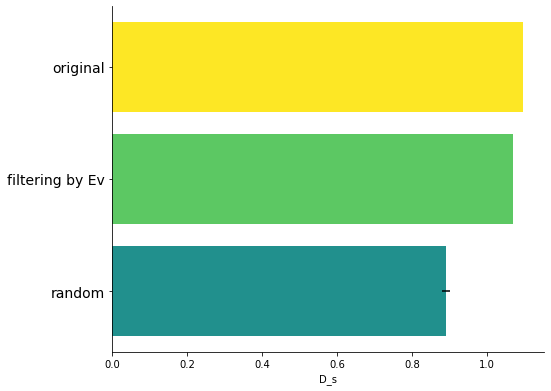

In [70]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(result)),len(result)))
tick_l=[]


ax.barh(0,result['originial'],color=alph_col[[0],:],label='originial')
tick_l.append('original')
ax.barh(1,result['filtering by Ev'],color=alph_col[[1],:],label='filtering by Ev')
tick_l.append('filtering by Ev')

ax.barh(2,np.mean(result['random']),xerr=np.std(result['random']),color=alph_col[[2],:],label='random')
tick_l.append('random')

ax.invert_yaxis()
    
ax.set_xlabel('D_s')
ax.set_yticks([0,1,2])
ax.set_yticklabels(tick_l,fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



In [62]:
result

{'idx': 0,
 'originial': 1.097491780005418,
 'filtering by Ev': 1.0687058257959465,
 'random': [0.9028679662496695,
  0.8973900035364972,
  0.8894553164097895,
  0.8908045223279987,
  0.8875985649466178,
  0.8948365037325481,
  0.9031079509040838,
  0.8776690493681986,
  0.8821698963119363,
  0.8887430248758749,
  0.8943942781926517,
  0.8870766403061052,
  0.8895297049713774,
  0.8723852606560905,
  0.8891543050824257,
  0.8936493815420858,
  0.8841961981421863,
  0.8833534669837357,
  0.8966977058726423,
  0.8846990314326814,
  0.9001893229516446,
  0.8950876758825033,
  0.90860477073058,
  0.8826711732550964,
  0.8950147195933879,
  0.8996673540822694,
  0.8924518158710315,
  0.8894858537528731,
  0.8990609066310968,
  0.8812981868044416,
  0.8934085727417951,
  0.871911335451289,
  0.9085363635981244,
  0.8921660397838872,
  0.8948888523267736,
  0.9024302467441788,
  0.8814006276264538,
  0.884856913590147,
  0.8783422463809384,
  0.9107532816520794,
  0.880432997145372,
  0.88549

NameError: name 'ev_sent_id' is not defined